# <u>***EDA and engineering of Quality***<u>

---
---

### ***1. EDA -- What makes a review a good review?***

#### <u>used dataset: review_1918.csv<u>

---
---

#### ***1.1 Import necessary modules***

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

import nltk
from nltk.corpus import stopwords

# -------------------------------- 

import spacy
import contextualSpellCheck
import en_core_web_sm
from spacy.lang.en.examples import sentences

!ln -s /Users/felixbecker/neuefische/Yelp-Capstone/modeling/Language.py Language.py
from Language import language_processing

from wordcloud import WordCloud

import unicodedata

/Users/felixbecker/neuefische/Yelp-Capstone/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ln: Language.py: File exists


---

#### ***1.2 Set global parameters***

In [2]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['figure.dpi'] = 150

---

#### ***1.3 Import dataset***

In [3]:
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

In [4]:
df_rev.query("useful != 0").count()

Unnamed: 0     721603
review_id      721603
user_id        721603
business_id    721603
stars          721603
useful         721603
funny          721603
cool           721603
text           721603
date           721603
year           721603
dtype: int64

---

#### ***1.4 Overview of the dataset***

In [5]:
df_rev.shape

(1813646, 11)

In [6]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813646 entries, 0 to 1813645
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  year         int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 152.2+ MB


In [7]:
df_rev.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
1327544,5234214,BNevOF7anzczqPQ0n9E7Jw,X_41LfwbKLI-msR7hu41pg,ac1AeYqs8Z4_e2X5M3if2A,3.0,0,0,0,Ate here our first night in town. The staff we...,2019-03-25 02:49:54,2019
1095644,4281837,xzkMRgr2QESv6E_Rud_Elw,FoYy4bkmpBi2kWX3k-7UJA,BjeHLwKOlHyV6DJgmZxAjA,5.0,0,0,0,Seriously the best breakfast I have ever had. ...,2018-05-01 15:02:20,2018
215011,950272,O_vlNQY11JNsisr2XJ8f2w,DQjh_tqqSHhMyp6wkQ-gUA,9u4_k8-XC4RFETCeiQdO8w,5.0,2,0,1,This is definitely my favorite Caesar salad & ...,2018-01-19 02:14:55,2018
391752,1599932,83ro-H215BKDcbLP7fSBsw,lkC1S7DQ4M20Sx1wNEexKg,eoMVY8MLh0pXHIW2zt5I8Q,1.0,0,0,0,Cool space but food was tasteless and the bart...,2018-02-18 07:58:53,2018
976000,3870054,KcjKlBM5fgwp9IVOxhoWYw,s1GjBqTtN3G7k1xZTqcKgg,_8SSuIhSyhsVl8p9CsLGCQ,5.0,1,0,0,I have been here a few times and always have h...,2019-07-07 21:01:35,2019
1455656,5626892,bBkPTPUdadoL3Dp8ltmG-A,8B4DJp6EaLntnR2zjBfLTQ,Pl_9HzOa8uy_YOUxgonzGw,5.0,0,0,0,The immediate service has a lot to be desired ...,2018-06-27 01:29:48,2018
393251,1611774,Ri-152XdlLd4oqXYLYFnWg,pW5Grd4WSlvkjBevpgRqoQ,RQAF6a0akMiot5lZZnMNNw,4.0,1,0,1,This was our last cheesesteak we had in Philad...,2018-07-12 20:11:07,2018
476335,1867754,jhXkZctcoCSI-4JbDXpBgg,d9Hn3KNgYwhKtlmAGWC-DQ,YSCnMgFyk7w0SpgsmXiAeA,1.0,0,0,0,Glad I didn't sign up for a membership. I went...,2018-03-11 16:32:24,2018
1785891,6854441,x1LHZrPFLhRz2v004FtbMA,DCYRxTclknqfmdVbfVzh2Q,Mj0eEQNzeL3kSPwSH8yRVA,3.0,4,1,1,My first time here. I've heard about this plac...,2019-03-06 02:47:35,2019
1776337,6823212,YTYen-wu4PaLmVWh_LMnbg,YcDzwFGNxSsI9tvohP9pKQ,I_mCFePUG2MGuH-zuws7bA,5.0,2,0,1,We always love coming to Great Full Gardens. I...,2019-05-28 22:52:44,2019


In [8]:
df_rev.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

---

#### ***1.5 Cleaning the dataset***

In [9]:
# Dropping 'Unnamed: 0', 'date', 'year'

df_rev.drop(['Unnamed: 0', 'date', 'year'], axis=1, inplace=True)

---

#### ***1.6 Gain information on rating***

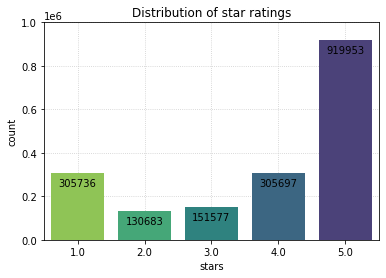

In [10]:
ax = sns.countplot(data=df_rev, x='stars', palette='viridis_r', zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

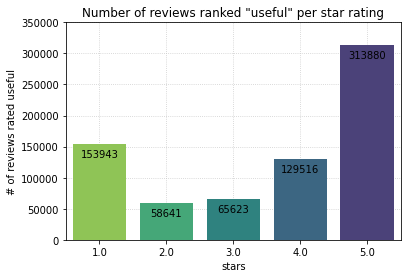

In [11]:
ax = sns.countplot(data=df_rev.query('useful != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 350000)
plt.ylabel('# of reviews rated useful')
plt.title('Number of reviews ranked "useful" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

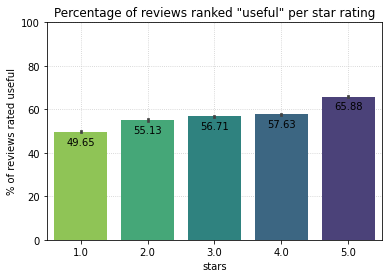

In [21]:
ax = sns.barplot(data=df_rev, x='stars', y='useful', estimator=lambda x : round(sum(x==0)*100.0/len(x),2), palette='viridis_r', zorder=2)
plt.ylim(0, 100)
plt.ylabel('% of reviews rated useful')
plt.title('Percentage of reviews ranked "useful" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

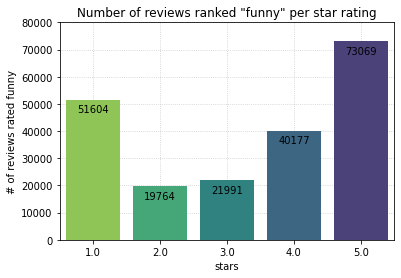

In [18]:
ax = sns.countplot(data=df_rev.query('funny != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 80000)
plt.ylabel('# of reviews rated funny')
plt.title('Number of reviews ranked "funny" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

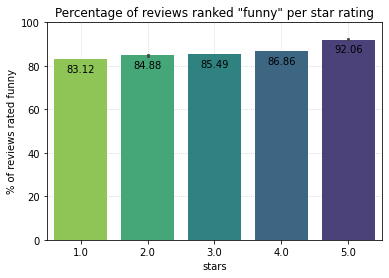

In [22]:
ax = sns.barplot(data=df_rev, x='stars', y='funny', estimator=lambda x : round(sum(x==0)*100.0/len(x),2), palette='viridis_r', zorder=2)
plt.ylim(0, 100)
plt.ylabel('% of reviews rated funny')
plt.title('Percentage of reviews ranked "funny" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

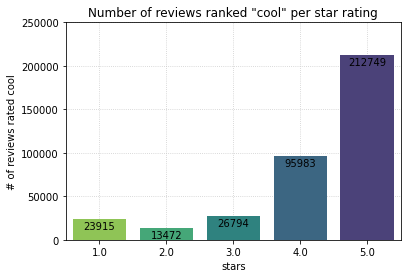

In [24]:
ax = sns.countplot(data=df_rev.query('cool != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 250000)
plt.ylabel('# of reviews rated cool')
plt.title('Number of reviews ranked "cool" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-12);

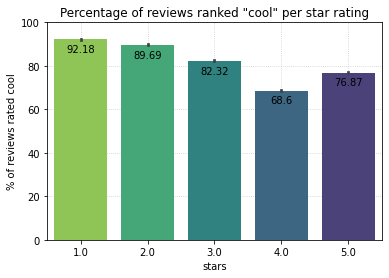

In [23]:
ax = sns.barplot(data=df_rev, x='stars', y='cool', estimator=lambda x : round(sum(x==0)*100.0/len(x),2), palette='viridis_r', zorder=2)
plt.ylim(0, 100)
plt.ylabel('% of reviews rated cool')
plt.title('Percentage of reviews ranked "cool" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

In [13]:
df_corr = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

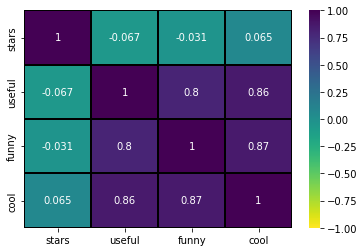

In [14]:
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

---

#### ***1.7 Gain information on texts***

In [15]:
# Get the number of unique words per review and save it to new column

df_rev['unique_words'] = df_rev['text'].apply(lambda x : len(set(str(x).split())))

# Get the number of used exclamation marks per review

df_rev['count_excl'] = df_rev['text'].str.count('!')

# Remove punctuation

df_rev["no_punct"] = df_rev['text'].str.replace('[^\w\s]','')

# Get the length of each review and save it to new column

df_rev['text_length'] = df_rev['no_punct'].str.len()

In [16]:
# Calculate mean text length per star rating and save in list

mean_lengths = []
mean_text_one = df_rev.query('stars == 1').text_length.mean().astype(int)
mean_lengths.append(mean_text_one)
mean_text_two = df_rev.query('stars == 2').text_length.mean().astype(int)
mean_lengths.append(mean_text_two)
mean_text_three = df_rev.query('stars == 3').text_length.mean().astype(int)
mean_lengths.append(mean_text_three)
mean_text_four = df_rev.query('stars == 4').text_length.mean().astype(int)
mean_lengths.append(mean_text_four)
mean_text_five = df_rev.query('stars == 5').text_length.mean().astype(int)
mean_lengths.append(mean_text_five)

mean_stars = [1.0, 2.0, 3.0, 4.0, 5.0]

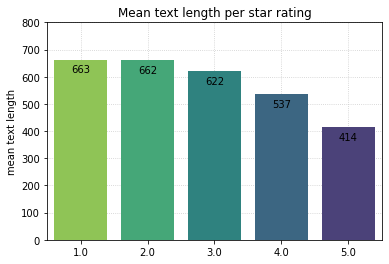

In [17]:
ax = sns.barplot(x=mean_stars, y=mean_lengths, palette='viridis_r', zorder=2)
plt.title('Mean text length per star rating')
plt.ylim(0, 800)
plt.ylabel('mean text length')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

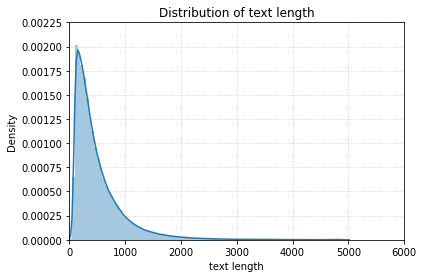

In [18]:
sns.distplot(df_rev['text_length'], bins=100)
plt.title('Distribution of text length')
plt.xlim(0, 6000)
plt.ylim(0, 0.00225)
plt.xlabel('text length')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

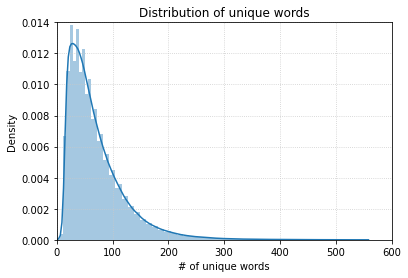

In [19]:
sns.distplot(df_rev['unique_words'], bins=100)
plt.title('Distribution of unique words')
plt.xlim(0, 600)
plt.ylim(0, 0.014)
plt.xlabel('# of unique words')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

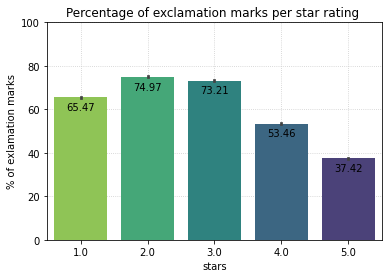

In [20]:
ax = sns.barplot(data=df_rev, x='stars', y='count_excl', estimator=lambda x : round(sum(x==0)*100.0/len(x),2), palette='viridis_r', zorder=2)
plt.title('Percentage of exclamation marks per star rating ')
plt.ylim(0, 100)
plt.ylabel('% of exlamation marks')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

In [21]:
df_corr_excl = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

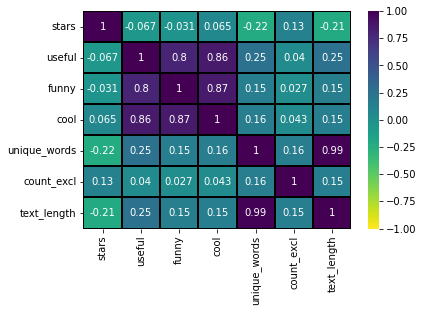

In [22]:
sns.heatmap(df_corr_excl.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

---
---

### ***2. Language and spelling***

---
---

#### ***2.1 Language processing***

In [23]:
# Predict the language per review with a certainty of at least 95%
# Drop all other languages than english
# Return the corresponding dataframe

language_processing(df_rev);

In [24]:
# Cleaning in language_processing is not applied in place!

df_rev = df_rev[df_rev['language'] == 'English']

---

#### ***2.2 Create word clouds for useful, funny and cool***

In [25]:
df_use = df_rev[df_rev['useful'] != 0]
df_fun = df_rev[df_rev['funny'] != 0]
df_cool = df_rev[df_rev['cool'] != 0]

In [26]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

# create a wordcloud using all the text in text
text_use = " ".join(text for text in df_use['text'])
text_fun = " ".join(text for text in df_fun['text'])
text_cool = " ".join(text for text in df_cool['text'])

#remove the stopwords from the text
wordcloud_use = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_fun = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_cool = WordCloud(stopwords=stopwords).generate(text_use)

#### ***World Cloud for reviews rated as useful***

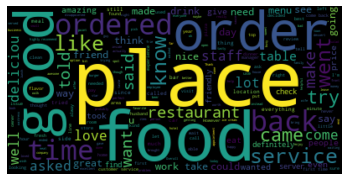

In [27]:
plt.imshow(wordcloud_use, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as funny***

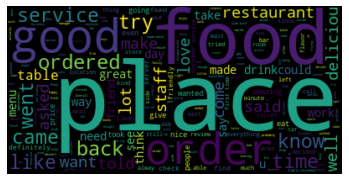

In [28]:
plt.imshow(wordcloud_fun, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as cool***

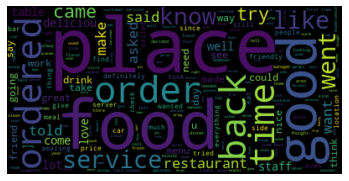

In [29]:
plt.imshow(wordcloud_cool, interpolation='bilinear')
plt.axis("off");
#print(wordcloud_cool.words_.keys())

---

#### ***2.3 Text cleaning and building N-grams for useful, funny and cool rated reviews***

In [30]:
# Basic text cleaning and Lemmatization

def text_cleaning(txt):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
    stopwords.extend(additional_stopwords)
    txt = (unicodedata.normalize('NFKD', txt)).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    words = re.sub(r'[^\w\s]', '', txt).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [31]:
# Apply the basic text cleaning and Lemmatization on each word list

words_use = text_cleaning(''.join(str(df_use['text'].tolist())))
words_fun = text_cleaning(''.join(str(df_fun['text'].tolist())))
words_cool = text_cleaning(''.join(str(df_cool['text'].tolist())))

In [32]:
# "Building" the N-grams of size 3 (Trigrams)
# CAREFUL THIS TAKES MORE THAN 4 HOURS

trigrams_use = (pd.Series(nltk.ngrams(words_use, 3)).value_counts())[:10]
trigrams_fun = (pd.Series(nltk.ngrams(words_fun, 3)).value_counts())[:10]
trigrams_cool = (pd.Series(nltk.ngrams(words_cool, 3)).value_counts())[:10]

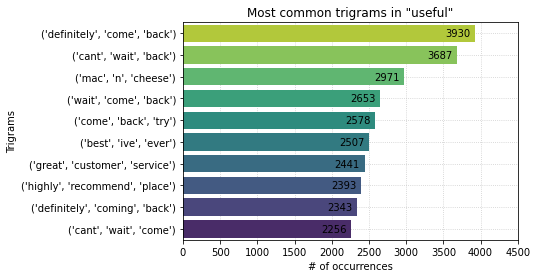

In [33]:
ax = sns.barplot(x=trigrams_use.values, y=trigrams_use.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "useful"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,4500)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

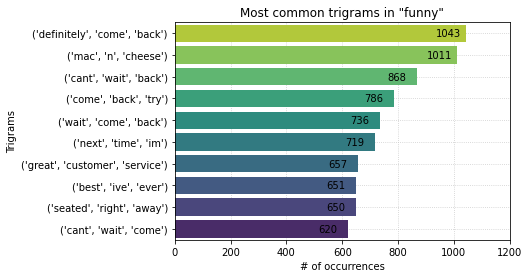

In [34]:
ax = sns.barplot(x=trigrams_fun.values, y=trigrams_fun.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "funny"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,1200)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

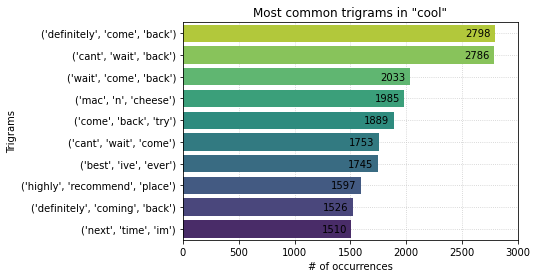

In [35]:
ax = sns.barplot(x=trigrams_cool.values, y=trigrams_cool.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "cool"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,3000)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---

#### ***2.4 Create word clouds for reviews with star ratings ≤ 2***

In [36]:
df_bad = df_rev[df_rev['stars'] <= 2]

In [37]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

text_bad = " ".join(text for text in df_bad['text'])
wordcloud_bad = WordCloud(stopwords=stopwords).generate(text_bad)

#### ***Word Cloud for "bad" reviews***

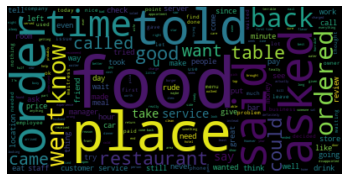

In [38]:
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off");

In [39]:
words_bad = text_cleaning(''.join(str(df_bad['text'].tolist())))

In [40]:
trigrams_bad = (pd.Series(nltk.ngrams(words_bad, 3)).value_counts())[:10]

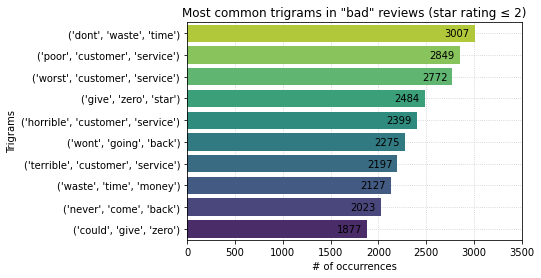

In [41]:
ax = sns.barplot(x=trigrams_bad.values, y=trigrams_bad.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "bad" reviews (star rating ≤ 2)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,3500)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---

#### ***2.5 Create word clouds for reviews with star ratings ≥ 4***

In [42]:
df_good = df_rev[df_rev['stars'] >= 4]

In [43]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

text_good = " ".join(text for text in df_good['text'])
wordcloud_good = WordCloud(stopwords=stopwords).generate(text_good)

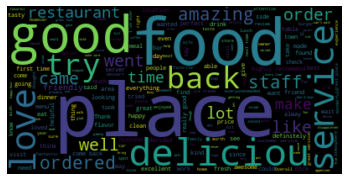

In [44]:
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off");

In [45]:
words_good = text_cleaning(''.join(str(df_good['text'].tolist())))

In [46]:
trigrams_good = (pd.Series(nltk.ngrams(words_good, 3)).value_counts())[:10]

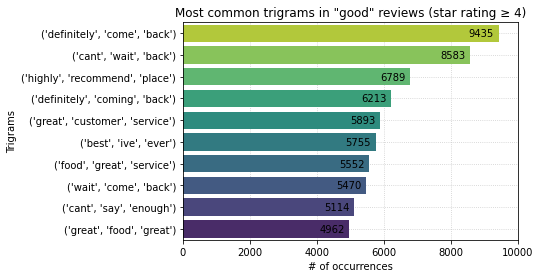

In [47]:
ax = sns.barplot(x=trigrams_good.values, y=trigrams_good.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "good" reviews (star rating ≥ 4)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,10000)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---
---

### ***3. Rating and Rating***

---
---

#### ***3.1 Useful 1-5 Stars***